# Analyzing My Personal Music Library: Trends, Moods, and Predictions.

I decided to analyse my personal playlists because I think that it would be interesting to see trends in what I listen to and predict what I will listen to in the future. My goal with this essay is to find correlations in my music and intepret that data to be able to understand my finding. 

## Possible Discoveries

- **Trends**: I want to see if there are any trends in my music library.

  *do I listen to more pop music in the summer? Do I listen to more sad songs in the winter?*

- **Moods**: I want to see if there are any correlations between the moods of the songs I listen to and my own moods.

  *do I listen to more happy songs when I'm feeling happy? Do I listen to more sad songs when I'm feeling sad?*

- **Predictions**: I want to see if I can predict what I will listen to in the future based on my past listening habits. 
  
  *do I tend to listen to more upbeat songs in the spring? Do I listen to more introspective songs in the fall?*

- **Genres**: I want to see if there are any correlations between the genres of the songs I listen to and my own moods.

  *do I listen to more pop music when I'm feeling happy? Do I listen to more sad music when I'm feeling sad?*

- **Artists**: I want to see if there are any correlations between the artists I listen to and my own moods.

  *do I listen to more upbeat artists when I'm feeling happy? Do I listen to more introspective artists when I'm feeling sad?*

- **Release Dates**: I want to see if there are any correlations between the release dates of the songs I listen to and my own moods.

  *do I listen to more new music when I'm feeling happy? Do I listen to more old music when I'm feeling sad?*

- **Popularity Metrics**: I want to see if there are any correlations between the popularity metrics of the songs I listen to and my own moods.

  *do I listen to more popular songs when I'm feeling happy? Do I listen to more obscure songs when I'm feeling sad?*

## Data Collection Phase

To analyze my personal music library, I first needed to collect data about my playlists. I used the Spotify API to extract information about my playlists, including the tracks, artists, and genres. I also gathered data on the release dates of the tracks and their popularity metrics.

Found 50 playlists.


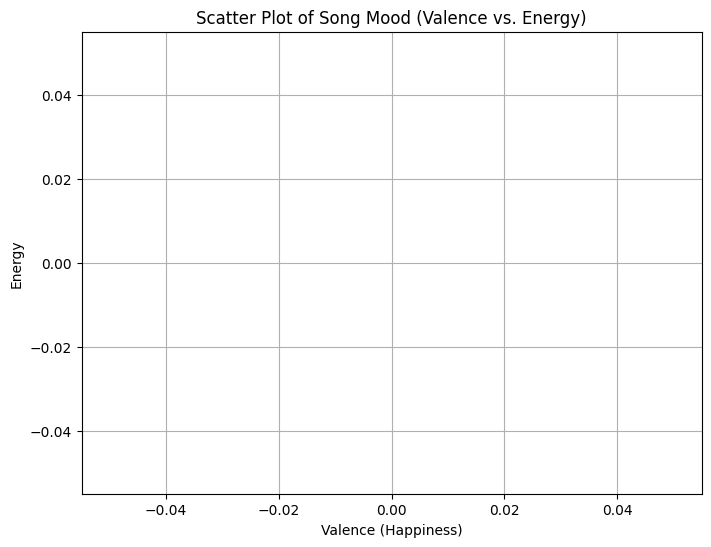

: 

In [ ]:
from spotipy import Spotify, SpotifyOAuth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import requests

import os

load_dotenv("secrets.env")

spotify_client_id = os.getenv('SPOTIFY_CLIENT_ID')
spotify_client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')
spotify_redirect_uri = os.getenv('SPOTIFY_REDIRECT_URI')

sp = Spotify(auth_manager=SpotifyOAuth(client_id=spotify_client_id, client_secret=spotify_client_secret, redirect_uri=spotify_redirect_uri))

# Get all playlists for the user (already stored in 'playlists')
all_tracks = []
tracks = []

playlists = sp.current_user_playlists()
if playlists['items']:
    print(f"Found {len(playlists['items'])} playlists.")

for playlist in playlists['items']:
    playlist_id = playlist['id']
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    all_tracks.extend(tracks)

# Flatten and extract relevant track info
track_data = []
for item in all_tracks:
    track = item['track']
    if track:  # skip if track is None (sometimes happens with removed tracks)
        track_data.append({
            'track_name': track['name'],
            'artist': ', '.join([artist['name'] for artist in track['artists'] if artist['name'] is not None]),
            'album': track['album']['name'],
            'added_at': item['added_at'],
            'track_id': track['id']
        })

tracks_df = pd.DataFrame(track_data)

# Now that I have the track data, I can proceed with the analysis

def get_audio_features(track_id, access_token):
    url = f"https://api.spotify.com/v1/audio-features/{track_id}"
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Get your access token from Spotipy's OAuth manager
access_token = sp.auth_manager.get_access_token(as_dict=False)

audio_features = []
for tid in tracks_df['track_id']:
    features = get_audio_features(tid, access_token)
    if features:
        audio_features.append(features)
    else:
        audio_features.append({'valence': None, 'energy': None})

features_df = pd.DataFrame(audio_features)
tracks_df['valence'] = features_df['valence']
tracks_df['energy'] = features_df['energy']

# 3. Scatter plot: valence vs. energy (as a proxy for mood)
plt.figure(figsize=(8,6))
plt.scatter(tracks_df['valence'], tracks_df['energy'], alpha=0.7)
plt.xlabel('Valence (Happiness)')
plt.ylabel('Energy')
plt.title('Scatter Plot of Song Mood (Valence vs. Energy)')
plt.grid(True)
plt.show()





### Interpretation

As you can see, my Spotify username popped up with the name **'cheese'**. This is a good sign and confirms that the authentication process with the Spotify API was successful. It is one of the first steps in analyzing my music library.

### Next Steps: Aggregating Top Tracks

The next step in the analysis is to aggregate **10 of my most played tracks of all time**. This will involve:

1. Fetching data on my top tracks using the Spotify API.
2. Extracting relevant attributes for each track, such as:
   - Track name
   - Artist(s)
   - Play count
   - Features like tempo, energy, and danceability.
3. Structuring the data for further analysis and visualization.